In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os
import json

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# get call environmental variable PUIDATA
PUIDATA = os.getenv('PUIDATA')
PUIDATA

'/home/cusp/ep2247/PUIdata'

In [3]:
# read in the datasets using the env. variable

nrg = pd.read_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = pd.read_csv(os.getenv("PUIDATA") + "/Manhattan/MN.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
#bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/Manhattan/MNMapPLUTO.shp")

In [5]:
bsize = pd.DataFrame(bsize)
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

In [6]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BI

In [7]:
nrg = nrg[['BBL', 'Postcode', 'DOF Property Floor Area (Buildngs and Parking)(ft2)',
          'Borough', 'DOF Number of Buildings','Site EUI(kBtu/ft2)']]
nrg.head()

,BBL,Postcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,NaN,Manhattan,NaN,NaN
1,4.021460e+09,11375.0,82730.0,Queens,1.0,NaN
2,2.027620e+09,NaN,NaN,Bronx,NaN,NaN
3,1.006700e+09,10001.0,440360.0,Manhattan,1.0,NaN
4,2.048300e+09,NaN,NaN,Bronx,NaN,NaN


In [8]:
nrg.columns = ['BBL','Zipcode','DOF Property Floor Area (Buildngs and Parking)(ft2)','Borough',
           'DOF Number of Buildings','Site EUI(kBtu/ft2)']
nrg.head()

,BBL,Zipcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,NaN,Manhattan,NaN,NaN
1,4.021460e+09,11375.0,82730.0,Queens,1.0,NaN
2,2.027620e+09,NaN,NaN,Bronx,NaN,NaN
3,1.006700e+09,10001.0,440360.0,Manhattan,1.0,NaN
4,2.048300e+09,NaN,NaN,Bronx,NaN,NaN


In [9]:
nrg = nrg[nrg['Borough'] == 'Manhattan']
nrg.head()

,BBL,Zipcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2)
0,1.000410e+09,NaN,NaN,Manhattan,NaN,NaN
3,1.006700e+09,10001.0,440360.0,Manhattan,1.0,NaN
15,1.004370e+09,10009.0,52390.0,Manhattan,1.0,NaN
16,1.013110e+09,10022.0,313200.0,Manhattan,1.0,125.4
18,1.006460e+09,NaN,NaN,Manhattan,NaN,NaN


In [10]:
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

In [11]:
bsize = bsize[['BBL','ZipCode', 'UnitsRes', 'UnitsTotal', 'YearBuilt']]
bsize.head()

,BBL,ZipCode,UnitsRes,UnitsTotal,YearBuilt
0,1.000010e+09,10004.0,0,0,1900
1,1.000010e+09,10004.0,0,0,1900
2,1.000010e+09,10004.0,0,0,1900
3,1.000010e+09,10004.0,0,0,0
4,1.000010e+09,10004.0,0,0,0


# Exploratory Analysis

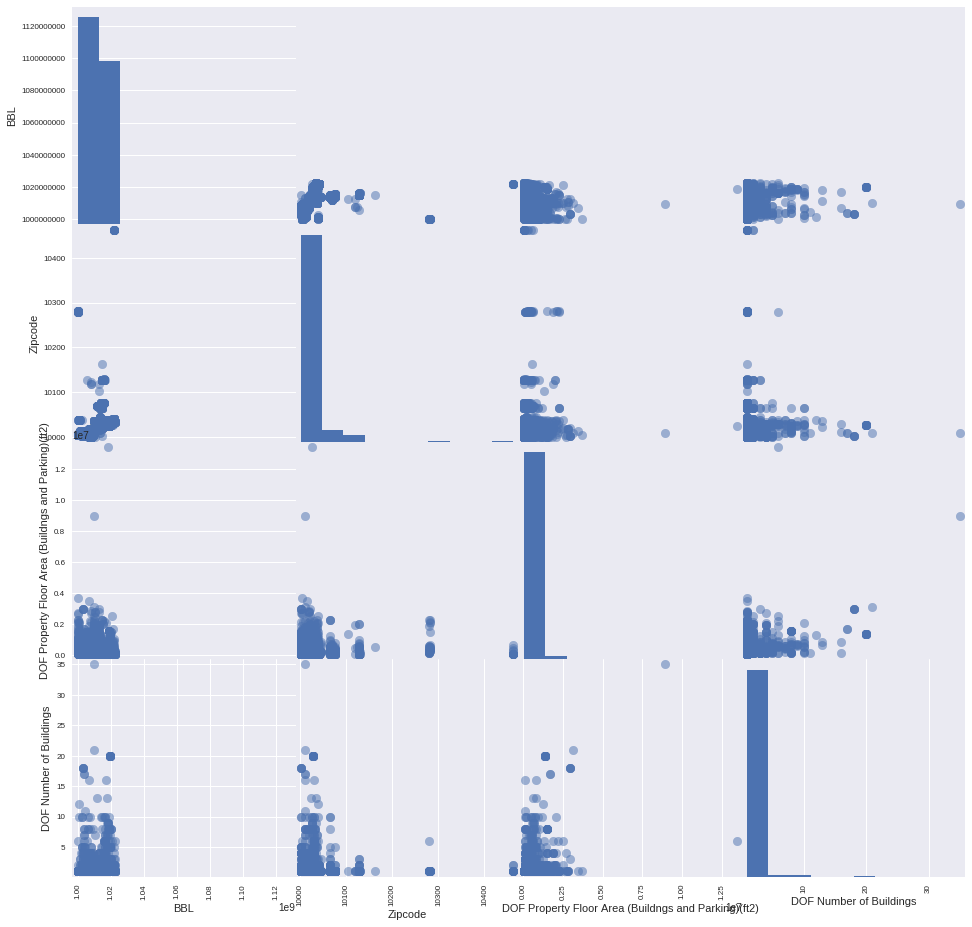

In [12]:
#try make a scatter plot of nrg. Few columns will plot - only those that have numerical values. 
#Pandas will ignore the other ones

from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

## Figure 1:

### In the scatter matrix, you see that the plots are identical for each variable just rotated (eg. BBL vs. DOF Number of Buildings).  When plotting variables against themselves, they make a plot similer to a bar graph or possibly a histrogram.  The scatter matrix also did not plot the Site EUI(kBtu/ft2) column, or the Borough Column from the nrg dataframe.    The is probably due to the fact that those two columns are objects instead of floats.

In [13]:
nrg.dtypes

BBL                                                    float64
Zipcode                                                float64
DOF Property Floor Area (Buildngs and Parking)(ft2)    float64
Borough                                                 object
DOF Number of Buildings                                float64
Site EUI(kBtu/ft2)                                      object
dtype: object

In [14]:
# convert objects to floats

def tonumeric(x):
    x = pd.to_numeric(x, errors = 'coerce')
    return x
    

In [15]:
nrg['Site EUI(kBtu/ft2)'] = nrg['Site EUI(kBtu/ft2)'].apply(tonumeric)

In [16]:
nrg.dtypes

BBL                                                    float64
Zipcode                                                float64
DOF Property Floor Area (Buildngs and Parking)(ft2)    float64
Borough                                                 object
DOF Number of Buildings                                float64
Site EUI(kBtu/ft2)                                     float64
dtype: object

In [17]:
bsize.dtypes

BBL           float64
ZipCode       float64
UnitsRes        int64
UnitsTotal      int64
YearBuilt       int64
dtype: object

In [18]:
#How many missing values?
indx = np.isnan(nrg['Site EUI(kBtu/ft2)']).sum()
print ("invalid entries changed to NaN %d"%sum(indx))
#do it for however many columns you need

invalid entries changed to NaN 1544


In [19]:
pd.merge?

In [20]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010010.0, 1000410001.0)

In [21]:
#merge the datasets together on the column BBL

bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape

(4711, 10)

In [22]:
bblnrgdata.head()

,BBL,Zipcode,DOF Property Floor Area (Buildngs and Parking)(ft2),Borough,DOF Number of Buildings,Site EUI(kBtu/ft2),ZipCode,UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,10022.0,313200.0,Manhattan,1.0,125.4,10022.0,0,56,1977
15,1.007660e+09,10011.0,53168.0,Manhattan,1.0,122.3,10011.0,0,8,1912
16,1.008150e+09,10018.0,364000.0,Manhattan,1.0,117.0,10018.0,0,24,1954
18,1.005050e+09,10013.0,214110.0,Manhattan,1.0,82.1,10013.0,0,24,1926
19,1.021420e+09,10032.0,64816.0,Manhattan,1.0,137.7,10032.0,54,62,1924


In [23]:
bblnrgdata = bblnrgdata[['BBL','DOF Property Floor Area (Buildngs and Parking)(ft2)', 
                         'DOF Number of Buildings','Site EUI(kBtu/ft2)','UnitsRes','UnitsTotal',
                        'YearBuilt']]
bblnrgdata.head()

,BBL,DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,313200.0,1.0,125.4,0,56,1977
15,1.007660e+09,53168.0,1.0,122.3,0,8,1912
16,1.008150e+09,364000.0,1.0,117.0,0,24,1954
18,1.005050e+09,214110.0,1.0,82.1,0,24,1926
19,1.021420e+09,64816.0,1.0,137.7,54,62,1924


In [24]:
bblnrgdata2 = bblnrgdata[['BBL','Site EUI(kBtu/ft2)','UnitsRes','UnitsTotal','YearBuilt']]
bblnrgdata2.head()

,BBL,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,0,56,1977
15,1.007660e+09,122.3,0,8,1912
16,1.008150e+09,117.0,0,24,1954
18,1.005050e+09,82.1,0,24,1926
19,1.021420e+09,137.7,54,62,1924


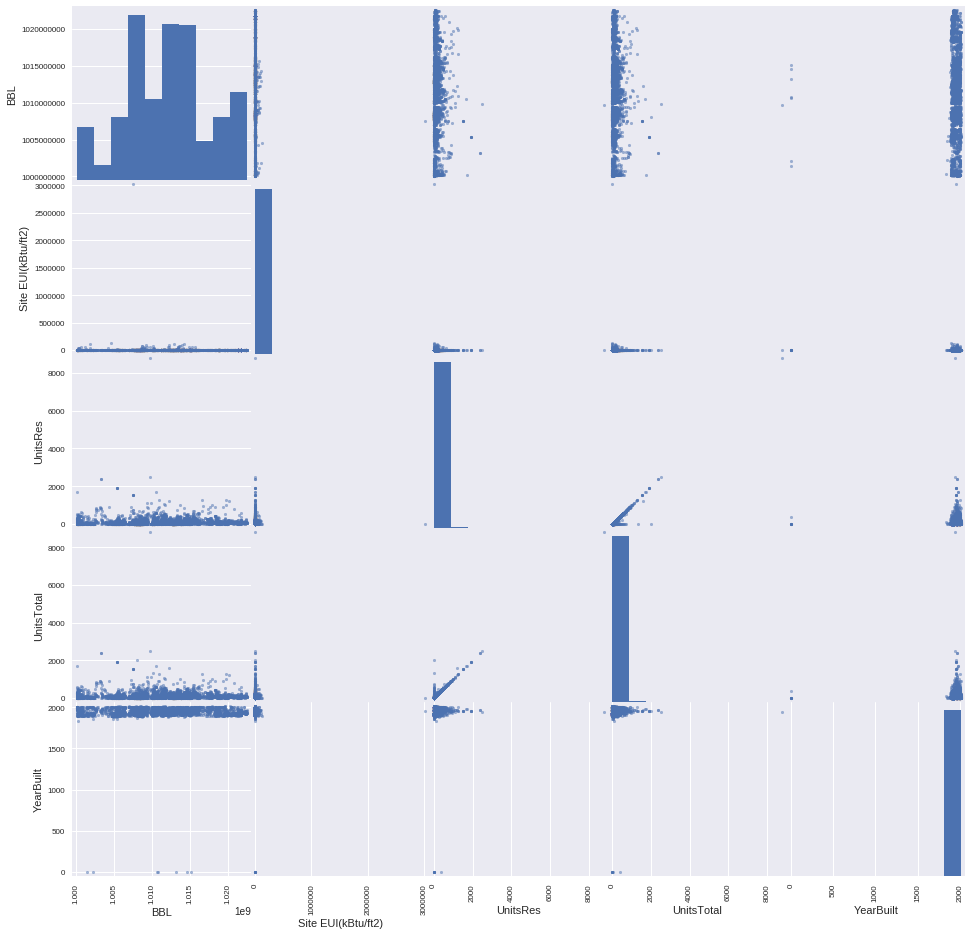

In [25]:
#Scatter matric of the merged data

scatter_matrix (bblnrgdata2, s=30, figsize=(16, 16));

## Figure 2:  The matrix shows us the relationships between all the variables in the merged dataframe.  Compared to the nrg scatter matrix, BBL against BBL has more of a histogram shape to it, while the other variables against themselves still have more of a bar plot shape.

In [26]:
bblnrgdata2['Total Energy Consumption (kBtu)'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['DOF Property Floor Area (Buildngs and Parking)(ft2)']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
bblnrgdata2.head()

,BBL,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt,Total Energy Consumption (kBtu)
2,1.013110e+09,125.4,0,56,1977,39275280.0
15,1.007660e+09,122.3,0,8,1912,6502446.4
16,1.008150e+09,117.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,0,24,1926,17578431.0
19,1.021420e+09,137.7,54,62,1924,8925163.2


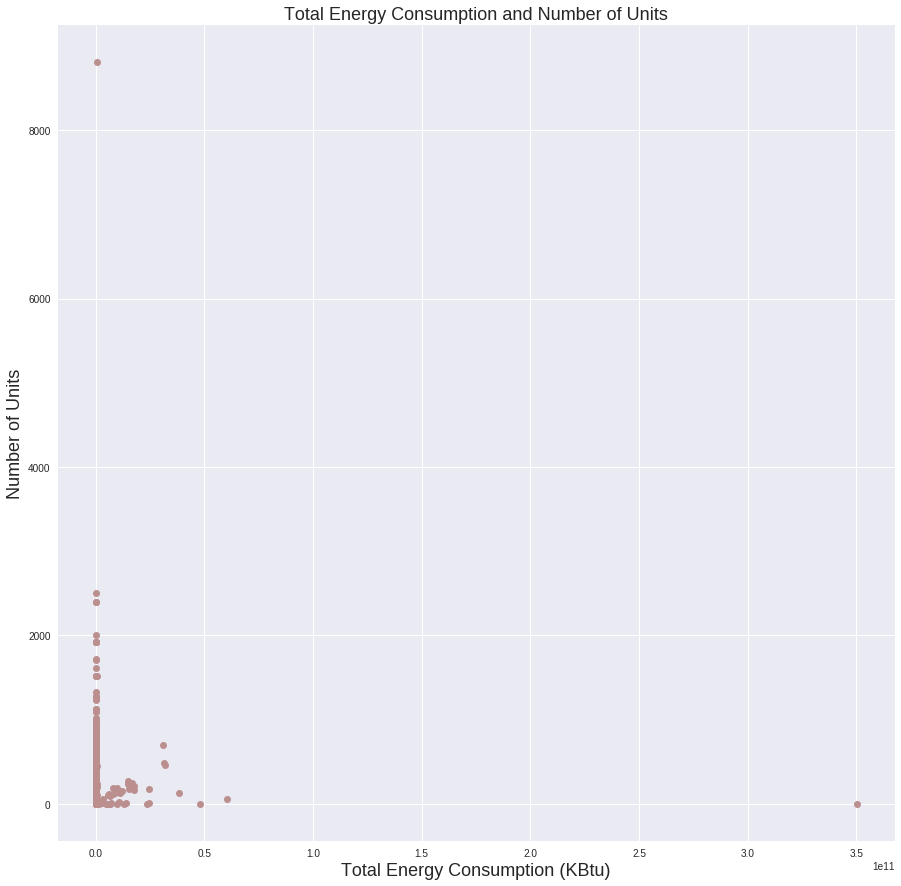

In [28]:
fig = figsize(15,15)
ax = subplot(111)
pl.plot(bblnrgdata2['Total Energy Consumption (kBtu)'],bblnrgdata2['UnitsTotal'],
        'o',color='rosybrown')
ax.set_xlabel("Total Energy Consumption (KBtu)",fontsize='18')
ax.set_ylabel("Number of Units",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units",fontsize='18')

## Figure 3: Scatter plot showing the total energy consumption(kBtu) vs. number of units.

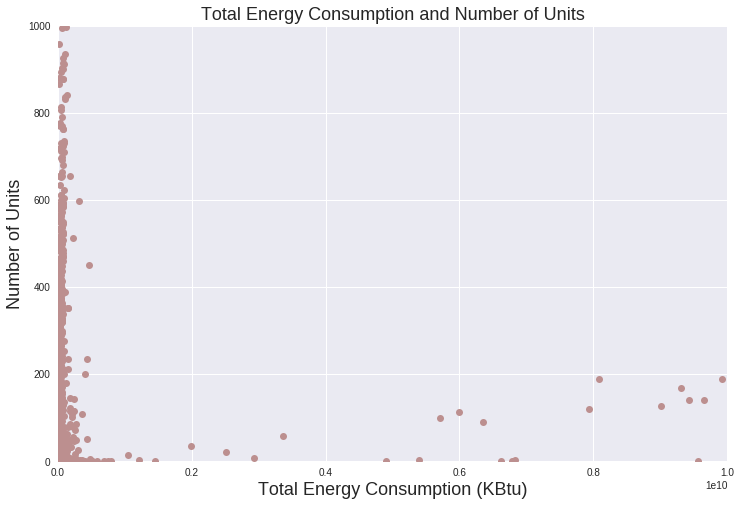

In [29]:
fig = figsize(12,8)
ax = subplot(111)
pl.plot(bblnrgdata2['Total Energy Consumption (kBtu)'],bblnrgdata2['UnitsTotal'],
        'o',color='rosybrown')
ax.set_xlim(1000,1e10)
ax.set_ylim(1,1000)
ax.set_xlabel("Total Energy Consumption (KBtu)",fontsize='18')
ax.set_ylabel("Number of Units",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units",fontsize='18')

## Figure 4: Scatter plot showing the total energy consumption(kBtu) vs. number of units.  Zoomed in to area where most of the points are located.

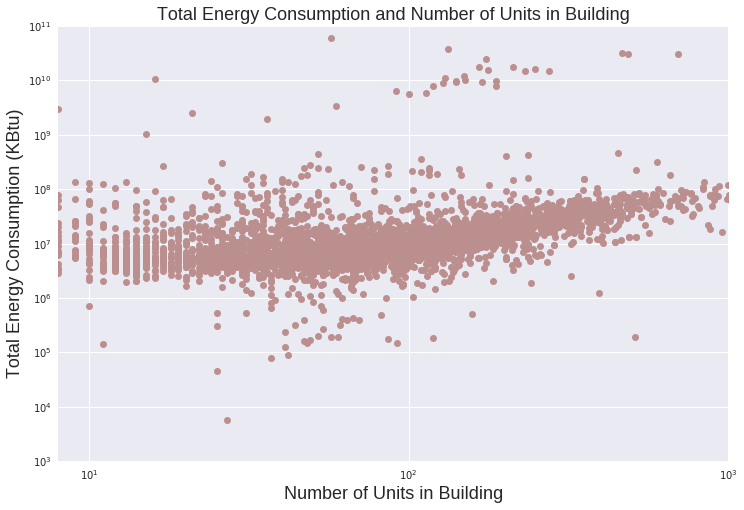

In [30]:
fig = figsize(12,8)
ax = subplot(111)
pl.loglog(bblnrgdata2['UnitsTotal'],bblnrgdata2['Total Energy Consumption (kBtu)'],
          'o',color='rosybrown')
ax.set_ylim(1000,1e11)
ax.set_xlim(8,1000)
ax.set_ylabel("Total Energy Consumption (KBtu)",fontsize='18')
ax.set_xlabel("Number of Units in Building",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units in Building",fontsize='18')

## Figure 5: Log scatter plot showing the number of units vs. total energy consumption(kBtu).

In [31]:

bblnrgdataCut = bblnrgdata2[(bblnrgdata2['Total Energy Consumption (kBtu)'] > 1000) *
                            (bblnrgdata2.UnitsTotal>=10) * (bblnrgdata2.UnitsTotal<1000)]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [32]:
bblnrgdataCut.head()

,BBL,Site EUI(kBtu/ft2),UnitsRes,UnitsTotal,YearBuilt,Total Energy Consumption (kBtu)
2,1.013110e+09,125.4,0,56,1977,39275280.0
16,1.008150e+09,117.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,0,24,1926,17578431.0
19,1.021420e+09,137.7,54,62,1924,8925163.2
20,1.021750e+09,103.2,75,85,1920,6485810.4


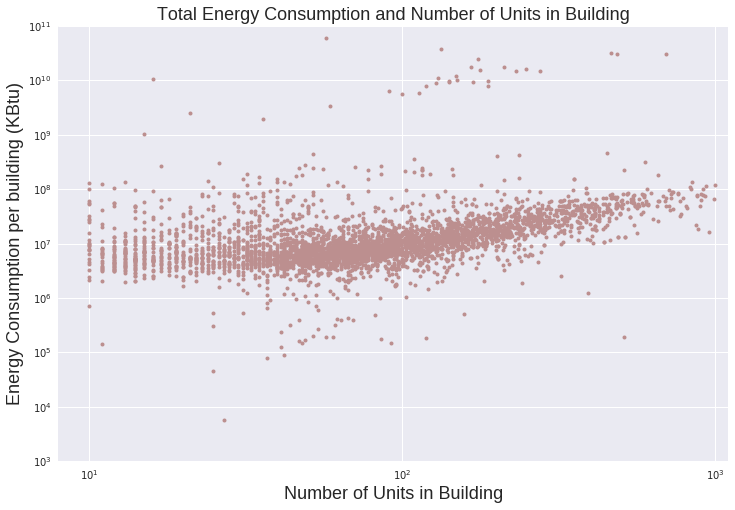

In [33]:
fig = figsize(12,8)
ax = subplot(111)
pl.loglog(bblnrgdataCut['UnitsTotal'],bblnrgdataCut['Total Energy Consumption (kBtu)'],
          'o',color='rosybrown', markersize = '4')
ax.set_ylim(1000,1e11)
ax.set_xlim(8,1.1e3)
ax.set_ylabel("Energy Consumption per building (KBtu)",fontsize='18')
ax.set_xlabel("Number of Units in Building",fontsize='18')
ax.set_title("Total Energy Consumption and Number of Units in Building",fontsize='18')

## Figure 6: Log scatter plot showing the number of unit in Building vs. energy consumption per building (kBtu).

In [34]:
# OLS regression to make a line to fit to scatter plot
X = sm.add_constant(np.log10(bblnrgdataCut.UnitsTotal))
linmodel = sm.OLS(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']), X, missing='drop').fit()

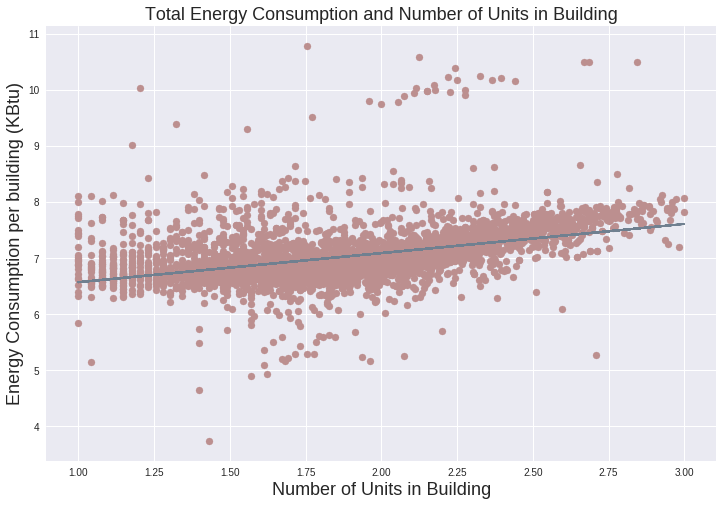

In [46]:
plt.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']),
           color = 'rosybrown')
#plot the fitted line
plt.plot(np.log10(bblnrgdataCut.UnitsTotal), linmodel.predict(X), c='slategray')
plt.ylabel("Energy Consumption per building (KBtu)",fontsize='18')
plt.xlabel("Number of Units in Building",fontsize='18')
plt.title("Total Energy Consumption and Number of Units in Building",fontsize='18')

## Figure 7: Log scatter plot with fitted line showing the number of unit in Building vs. energy consumption per building (kBtu).  

In [36]:
X2 = sm.add_constant(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']))
linmodel2 = sm.OLS(np.log10(bblnrgdataCut.UnitsTotal), X2, missing='drop').fit()

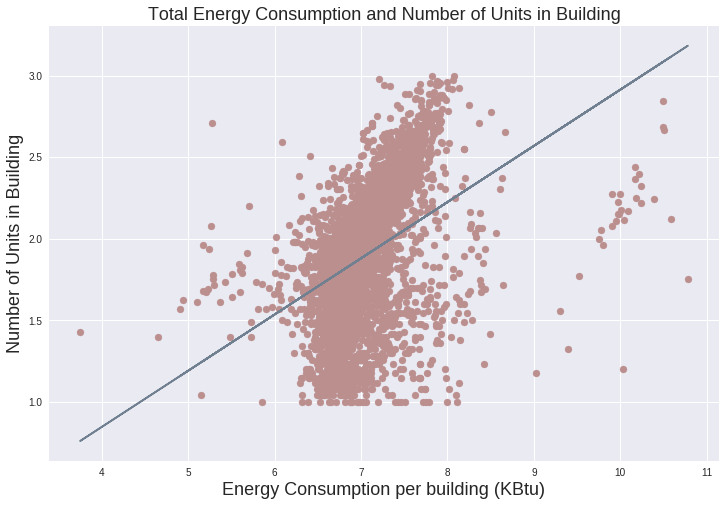

In [37]:
plt.scatter(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']), np.log10(bblnrgdataCut.UnitsTotal),
           color='rosybrown')
plt.plot(np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']), linmodel2.predict(X2), c='slategray')
plt.xlabel("Energy Consumption per building (KBtu)",fontsize='18')
plt.ylabel("Number of Units in Building",fontsize='18')
plt.title("Total Energy Consumption and Number of Units in Building",fontsize='18')

## Figure 8: Log scatter plot with fitted line showing energy consumption per building (kBtu) vs. the number of unit in Building. 

## Evaluate using chi - square
### these models are not nested.

In [38]:
# function to calculate chi-square

def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [39]:
data = bblnrgdataCut.UnitsTotal
model = bblnrgdataCut['Total Energy Consumption (kBtu)']

In [40]:
chi2(data, model, errors = None)

1.1439988410078443e+22

## Assume Poisson Statistics

In [47]:
errorsnrg = np.sqrt((bblnrgdataCut['Total Energy Consumption (kBtu)'])**2 +\
                (bblnrgdataCut['Site EUI(kBtu/ft2)']**2))

errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

In [48]:
errorsnrg

2       3.927528e+07
16      4.258800e+07
18      1.757843e+07
19      8.925163e+06
20      6.485810e+06
21      7.255848e+06
22      2.875951e+07
23      8.313213e+06
24      3.130797e+10
25      5.009769e+07
28      5.761611e+06
29      1.881401e+07
33      5.828835e+06
34      5.014208e+06
35      6.620981e+06
36      1.715652e+06
37      4.439610e+06
41      4.235629e+07
42      9.988104e+06
43      3.563584e+06
47      5.294454e+06
49      1.638492e+07
52      1.598128e+07
56      3.819427e+07
57      3.060013e+07
58      2.424946e+08
63      3.477535e+07
64      2.130472e+07
65      1.065811e+07
66      4.016535e+07
            ...     
5734    4.874772e+06
5736    3.945782e+06
5738    1.389520e+07
5744    1.883504e+07
5748    1.257256e+05
5749    4.545490e+06
5750    1.732500e+05
5753    1.914152e+06
5754    8.886553e+06
5758    4.455212e+06
5759    2.944603e+06
5760    4.060498e+06
5761    1.619616e+05
5763    5.803704e+06
5764    6.281066e+06
5770    7.029870e+06
5772    8.418

In [49]:
errorsunits

2        7.483315
16       4.898979
18       4.898979
19       7.874008
20       9.219544
21      11.313708
22       3.162278
23       7.810250
24      22.045408
25      21.283797
28       8.246211
29       9.433981
33       8.485281
34       7.483315
35       7.874008
36       9.746794
37       7.810250
41      22.934690
42       7.280110
43       6.557439
47       8.124038
49      15.459625
52      13.964240
56       6.000000
57      15.937377
58       7.211103
63       4.472136
64       4.690416
65       5.291503
66       7.071068
          ...    
5734     7.874008
5736     7.810250
5738    13.038405
5744     9.273618
5748     6.403124
5749     9.949874
5750     9.273618
5753    15.524175
5754     6.633250
5758     6.928203
5759     8.602325
5760     6.480741
5761     6.855655
5763     7.874008
5764     7.874008
5770     6.244998
5772     6.782330
5773    12.247449
5776     8.062258
5778     8.062258
5779     8.660254
5786     3.162278
5791    10.392305
5794     6.082763
5799     6

In [50]:
errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.nrg / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

AttributeError: 'DataFrame' object has no attribute 'nrg'

## EXPLAIN WHY SHE DID WHAT SHE DID

## Fit a second degree polynomial to units vs. energy line

In [51]:
# create a function to define the line

def line(a, b, x):
    y = a * x + b
    return a * x + b

In [52]:
np.random.seed(10)
x = np.random.rand(10)
line = line(7,17, x)

In [53]:
# create dataframe to put the line data in

dfpoly = pd.DataFrame({'x2': x*x, 'x': x, 'y': line})

In [54]:
polyline = smf.ols(formula = 'y ~x2 + x', data = dfpoly)

In [55]:
polymodel = polyline.fit()
#polymodel.summary()

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

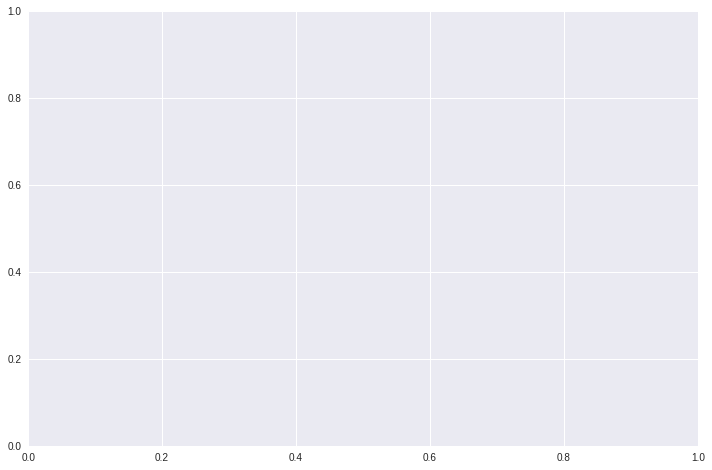

In [56]:
plt.scatter(np.log10(bblnrgdataCut.UnitsTotal), np.log10(bblnrgdataCut['Total Energy Consumption (kBtu)']),
           'o', color='rosybrown', markersize = '4')
#plot the fitted line
plt.plot(np.log10(bblnrgdataCut.UnitsTotal), linmodel.predict(X), c='slategray')
#plot the fitted polynomial line
##plt.plot(np.log10(bblnrgdataCut.UnitsTotal), polymodel.fittedvalues, c='maroon')

plt.ylabel("Energy Consumption per building (KBtu)",fontsize='18')
plt.xlabel("Number of Units in Building",fontsize='18')
plt.title("Total Energy Consumption and Number of Units in Building",fontsize='18')